# Importing the libs

In [1]:
#!pip install xgboost

In [2]:
#!pip install python-docx

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from docx import Document

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',')

In [5]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [6]:
df.tail()

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  \
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   

      Unnamed: 15  Unnamed: 16  
9466          NaN          NaN  
9467          NaN          NaN  
9468          NaN          NaN  
9469          NaN          NaN  
9470          NaN          NaN

In [7]:
df.shape

(9471, 17)

# Data preprocessing part1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


What can we derive from the insights:
- The total num. of columns is 17
- Two datetime columns: Date, Time
- We can notice that total num. of entires is 9471, while most columns contain only 9357 non-null entries
- The columns Unnamed: 15 and Unnamed: 16 have 0 non-null columns

In [9]:
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis=1)

In [10]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [11]:
df.shape

(9471, 15)

In [12]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(9357, 15)

# EDA

In [15]:
doc_path = 'Dataset description.docx'
document = Document(doc_path)

for p in document.paragraphs:
    print(p.text)

Main link: https://archive.ics.uci.edu/ml/datasets/Air+Quality#
Data Set Information:
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing

From the description we can understand the data in more details, and see that missing values are tagged with the -200  value.

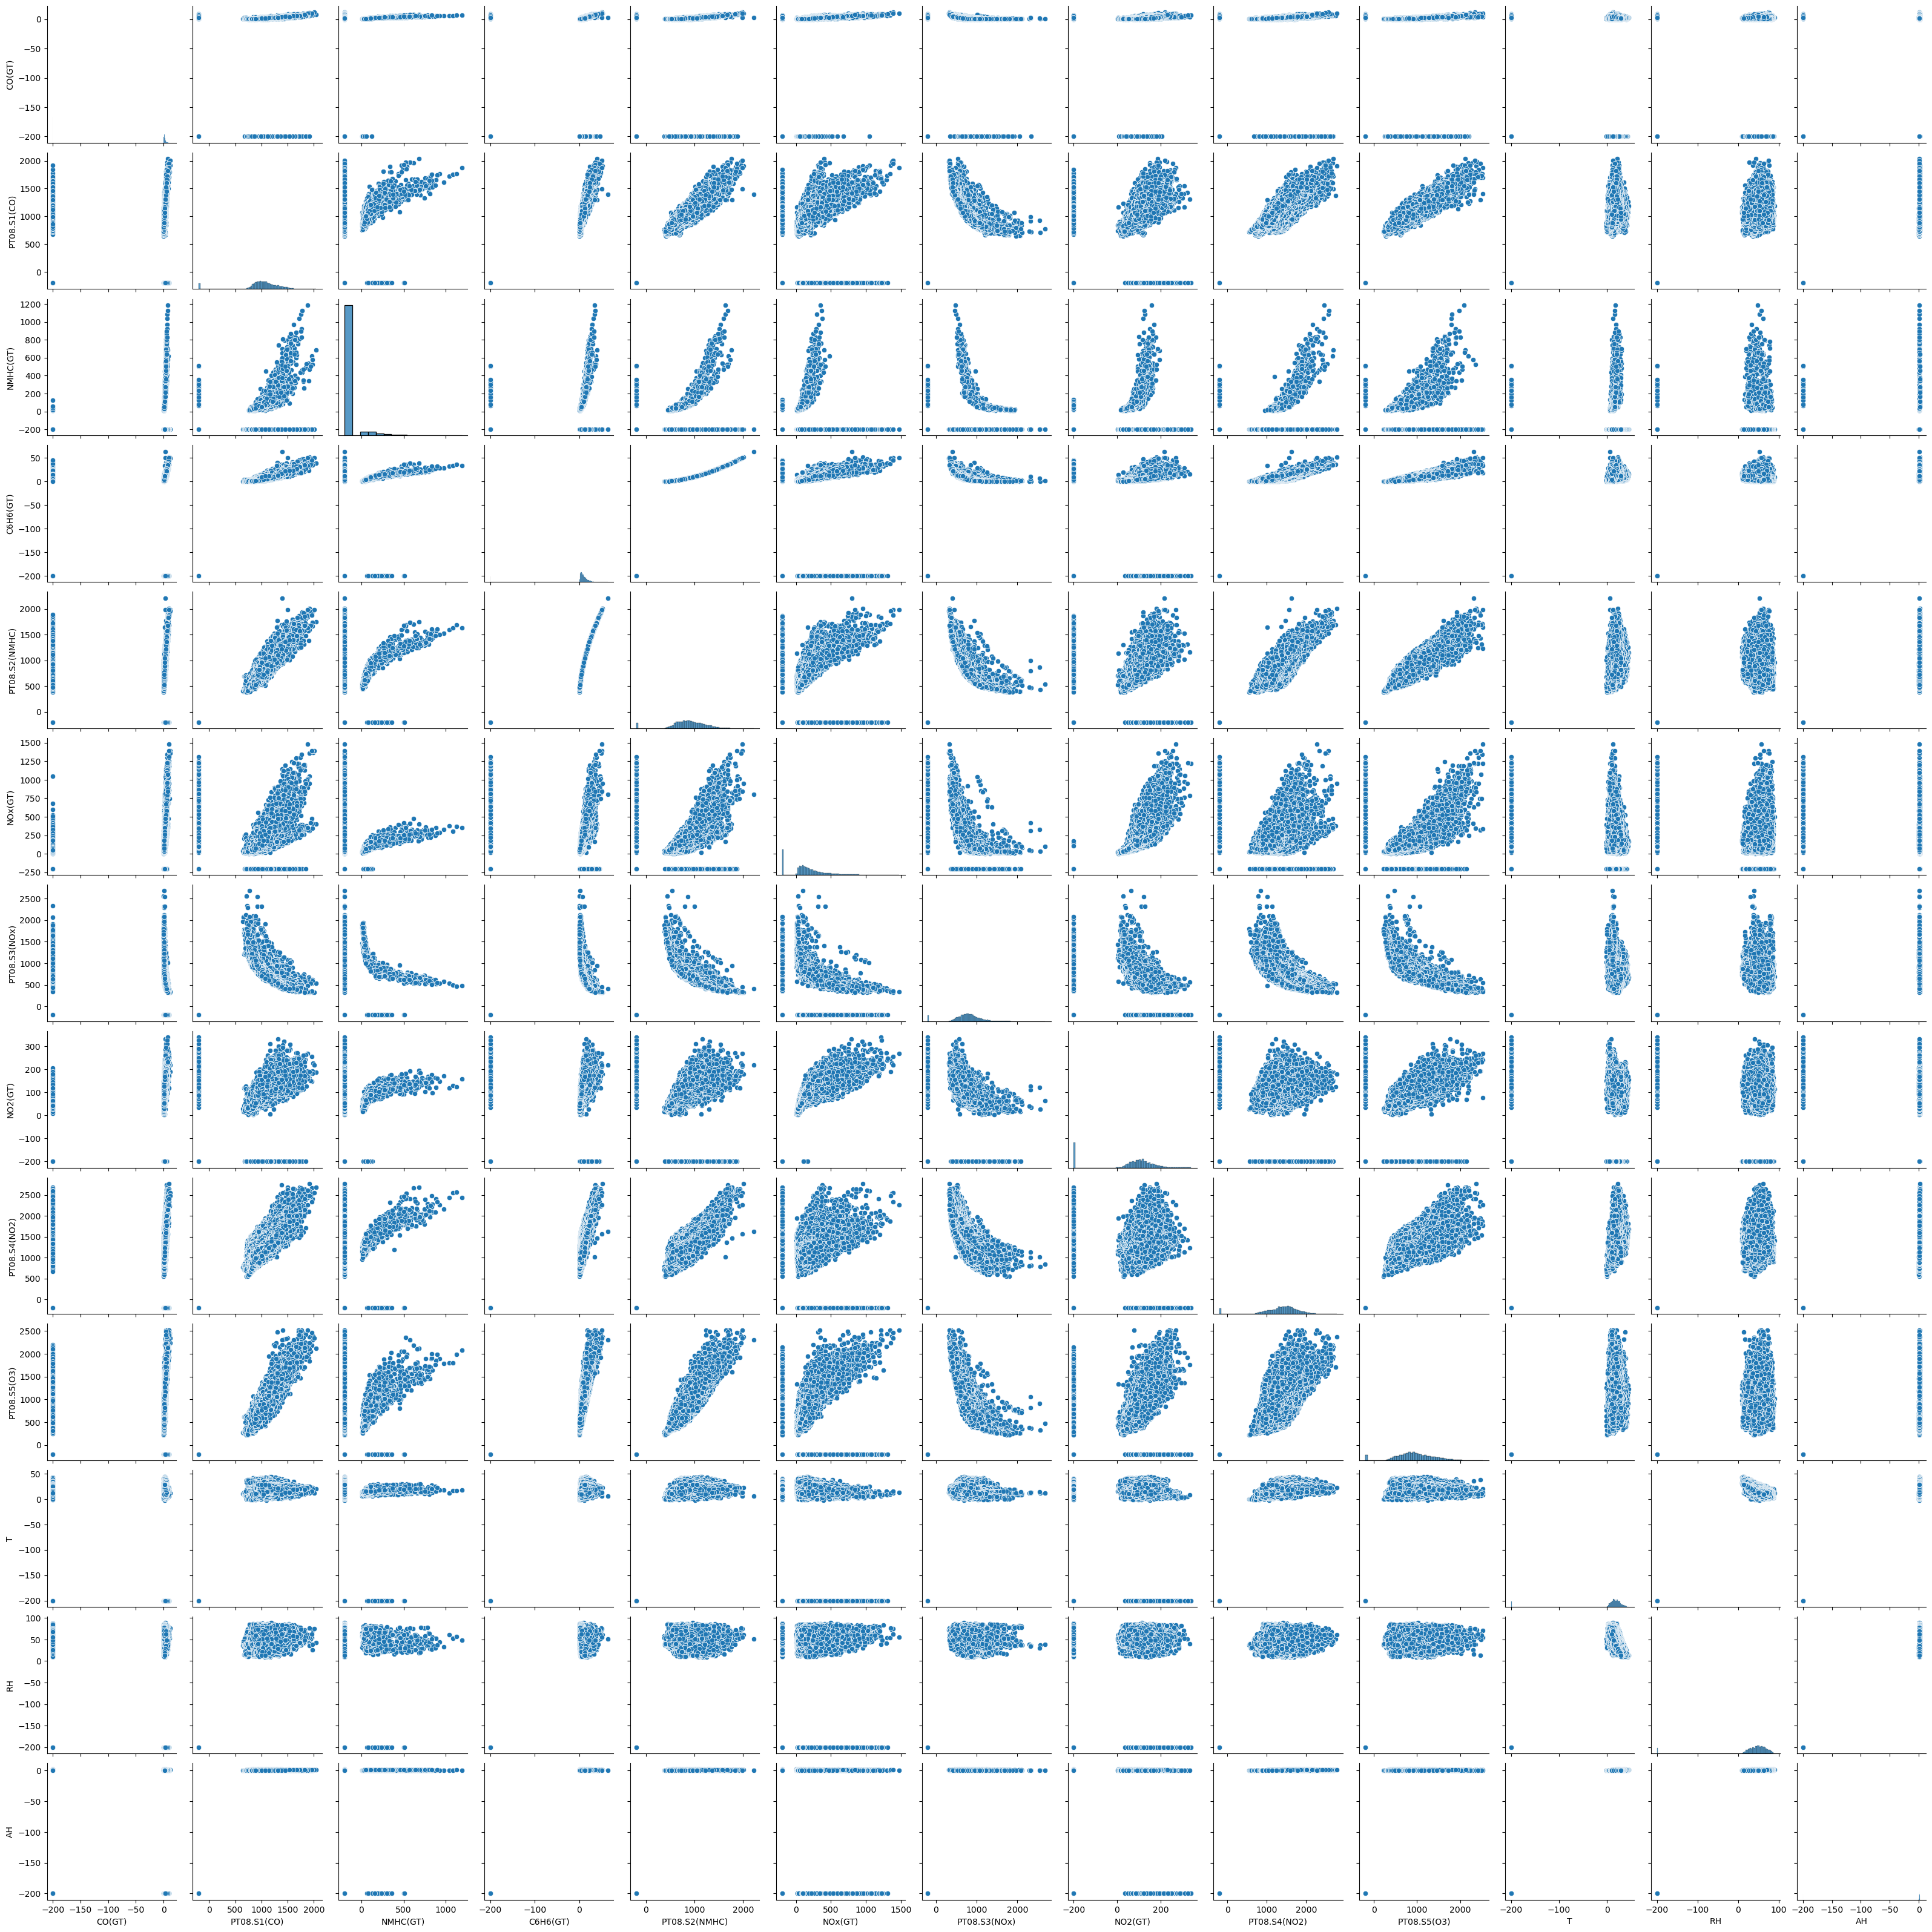

In [16]:
sns.pairplot(df.drop(['Date','Time'], axis=1) );

In [17]:
df.corr(numeric_only=True)['C6H6(GT)'].sort_values(ascending=False)

C6H6(GT)         1.000000
AH               0.984555
T                0.971375
RH               0.925062
PT08.S1(CO)      0.852687
PT08.S4(NO2)     0.774673
PT08.S2(NMHC)    0.767433
PT08.S5(O3)      0.641334
PT08.S3(NOx)     0.512193
NMHC(GT)         0.037323
NOx(GT)         -0.001174
NO2(GT)         -0.010992
CO(GT)          -0.031378
Name: C6H6(GT), dtype: float64

Features: AH, T, RH --> (Absolute Humidity, Temperature, Relative Humidity) are mostly correlated with the target

While features: NMHC(GT), NOx(GT), NO2(GT), CO(GT) are least correlated with the target

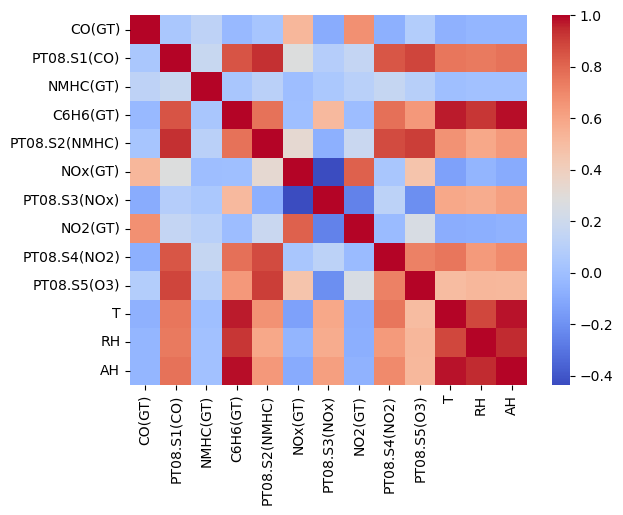

In [18]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm');

In [19]:
len(df.select_dtypes(exclude='object').columns.tolist())

13

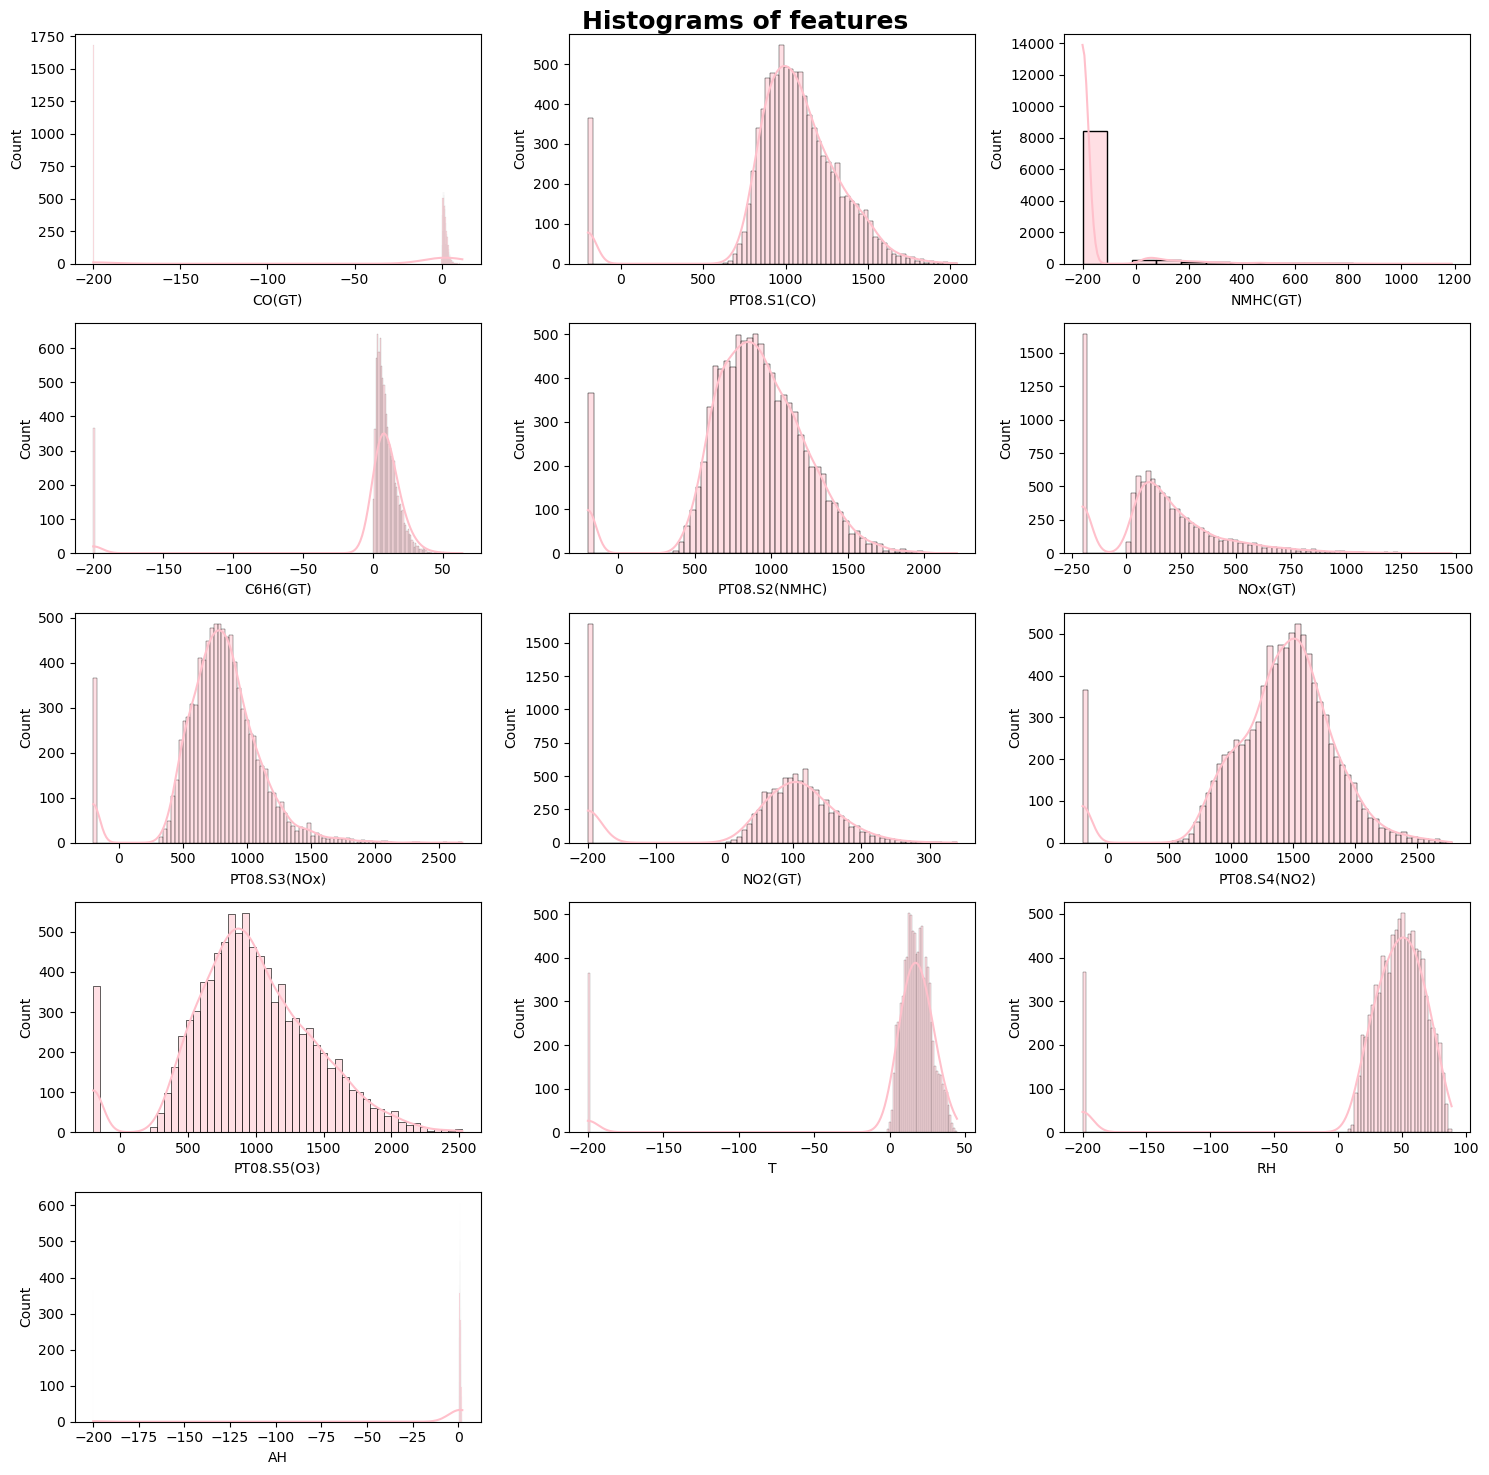

In [20]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=5, ncols=3)
fig.suptitle('Histograms of features', fontsize=18, fontweight='bold')

i = 0
j = 0
cols = df.select_dtypes(exclude='object').columns.tolist()

total_plots = len(cols)

for index, col in enumerate(cols):
    sns.histplot(ax=axes[i, j], data=df, kde=True, x=col, color='pink')
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1
    
    if index == total_plots - 1:
        break

for x in range(i, 5):
    for y in range(j, 3):
        fig.delaxes(axes[x][y])
        if y < 2:
            j += 1
    j = 0 

plt.tight_layout();

# Data preprocessing part2

In [21]:
df.set_index('Date',inplace=True)

In [22]:
df.head()

Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
10/03/2004  18.00.00     2.6       1360.0     150.0      11.9         1046.0   
10/03/2004  19.00.00     2.0       1292.0     112.0       9.4          955.0   
10/03/2004  20.00.00     2.2       1402.0      88.0       9.0          939.0   
10/03/2004  21.00.00     2.2       1376.0      80.0       9.2          948.0   
10/03/2004  22.00.00     1.6       1272.0      51.0       6.5          836.0   

            NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Date                                                                          
10/03/2004    166.0        1056.0    113.0        1692.0       1268.0  13.6   
10/03/2004    103.0        1174.0     92.0        1559.0        972.0  13.3   
10/03/2004    131.0        1140.0    114.0        1555.0       1074.0  11.9   
10/03/2004    172.0        1092.0    122.0        1584.0       1203.0  11.0   
10/03/2004    131.0        1205.0    116.0        1490.0       1110.0  11.2   

              RH      AH  
Date                      
10/03/2004  48.9  0.7578  
10/03/2004  47.7  0.7255  
10/03/2004  54.0  0.7502  
10/03/2004  60.0  0.7867  
10/03/2004  59.6  0.7888

In [23]:
df.index = pd.to_datetime(df.index, dayfirst=True)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
df.head()

Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                           
2004-03-10  18.00.00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10  19.00.00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10  20.00.00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10  21.00.00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10  22.00.00     1.6       1272.0      51.0       6.5          836.0   

            NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Date                                                                          
2004-03-10    166.0        1056.0    113.0        1692.0       1268.0  13.6   
2004-03-10    103.0        1174.0     92.0        1559.0        972.0  13.3   
2004-03-10    131.0        1140.0    114.0        1555.0       1074.0  11.9   
2004-03-10    172.0        1092.0    122.0        1584.0       1203.0  11.0   
2004-03-10    131.0        1205.0    116.0        1490.0       1110.0  11.2   

              RH      AH  
Date                      
2004-03-10  48.9  0.7578  
2004-03-10  47.7  0.7255  
2004-03-10  54.0  0.7502  
2004-03-10  60.0  0.7867  
2004-03-10  59.6  0.7888

In [25]:
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.hour

In [26]:
df.head()

Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                       
2004-03-10    18     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10    19     2.0       1292.0     112.0       9.4          955.0   
2004-03-10    20     2.2       1402.0      88.0       9.0          939.0   
2004-03-10    21     2.2       1376.0      80.0       9.2          948.0   
2004-03-10    22     1.6       1272.0      51.0       6.5          836.0   

            NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Date                                                                          
2004-03-10    166.0        1056.0    113.0        1692.0       1268.0  13.6   
2004-03-10    103.0        1174.0     92.0        1559.0        972.0  13.3   
2004-03-10    131.0        1140.0    114.0        1555.0       1074.0  11.9   
2004-03-10    172.0        1092.0    122.0        1584.0       1203.0  11.0   
2004-03-10    131.0        1205.0    116.0        1490.0       1110.0  11.2   

              RH      AH  
Date                      
2004-03-10  48.9  0.7578  
2004-03-10  47.7  0.7255  
2004-03-10  54.0  0.7502  
2004-03-10  60.0  0.7867  
2004-03-10  59.6  0.7888

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int32  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(13), int32(1)
memory usage: 1.0 MB


In [28]:
df.describe()

Time       CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean     11.498557   -34.207524  1048.990061  -159.090093     1.865683   
std       6.923182    77.657170   329.832710   139.789093    41.380206   
min       0.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%       5.000000     0.600000   921.000000  -200.000000     4.000000   
50%      11.000000     1.500000  1053.000000  -200.000000     7.900000   
75%      18.000000     2.600000  1221.000000  -200.000000    13.600000   
max      23.000000    11.900000  2040.000000  1189.000000    63.700000   

       PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count    9357.000000  9357.000000   9357.000000  9357.000000   9357.000000   
mean      894.595276   168.616971    794.990168    58.148873   1391.479641   
std       342.333252   257.433866    321.993552   126.940455    467.210125   
min      -200.000000  -200.000000   -200.000000  -200.000000   -200.000000   
25%       711.000000    50.000000    637.000000    53.000000   1185.000000   
50%       895.000000   141.000000    794.000000    96.000000   1446.000000   
75%      1105.000000   284.000000    960.000000   133.000000   1662.000000   
max      2214.000000  1479.000000   2683.000000   340.000000   2775.000000   

       PT08.S5(O3)            T           RH           AH  
count  9357.000000  9357.000000  9357.000000  9357.000000  
mean    975.072032     9.778305    39.485380    -6.837604  
std     456.938184    43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  -200.000000  
25%     700.000000    10.900000    34.100000     0.692300  
50%     942.000000    17.200000    48.600000     0.976800  
75%    1255.000000    24.100000    61.900000     1.296200  
max    2523.000000    44.600000    88.700000     2.231000

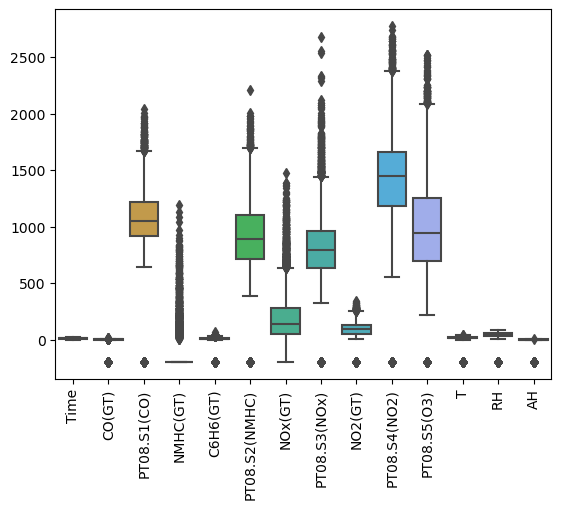

In [29]:
sns.boxplot(df)
plt.xticks(rotation=90);

In [30]:
df.replace(to_replace= -200, value=np.NaN, inplace=True)

In [31]:
df.isna().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

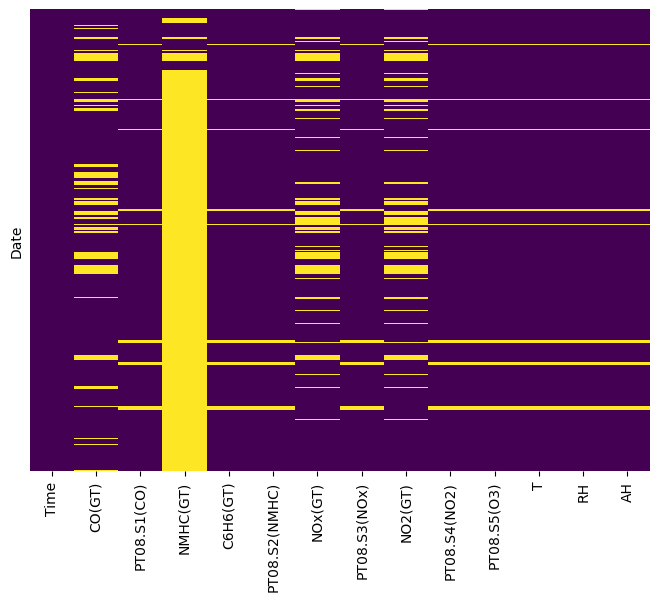

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna(), yticklabels=False, cmap='viridis', cbar=False);

In [33]:
df.drop('NMHC(GT)', axis=1, inplace=True)

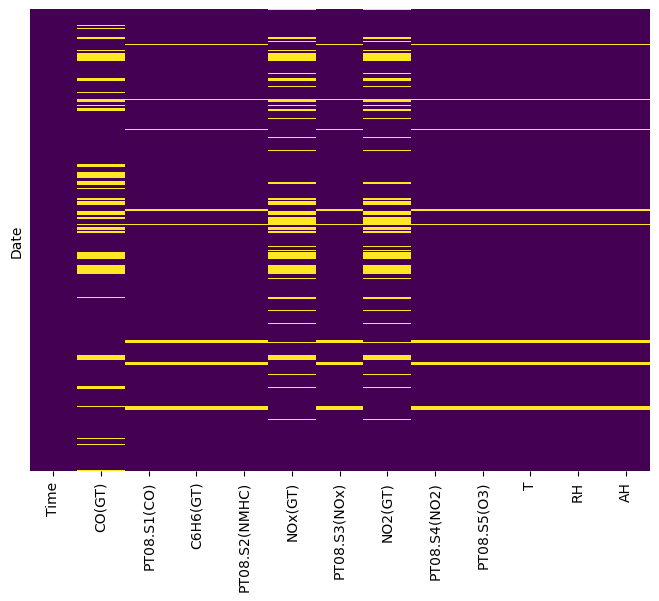

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna(), yticklabels=False, cmap='viridis', cbar=False);

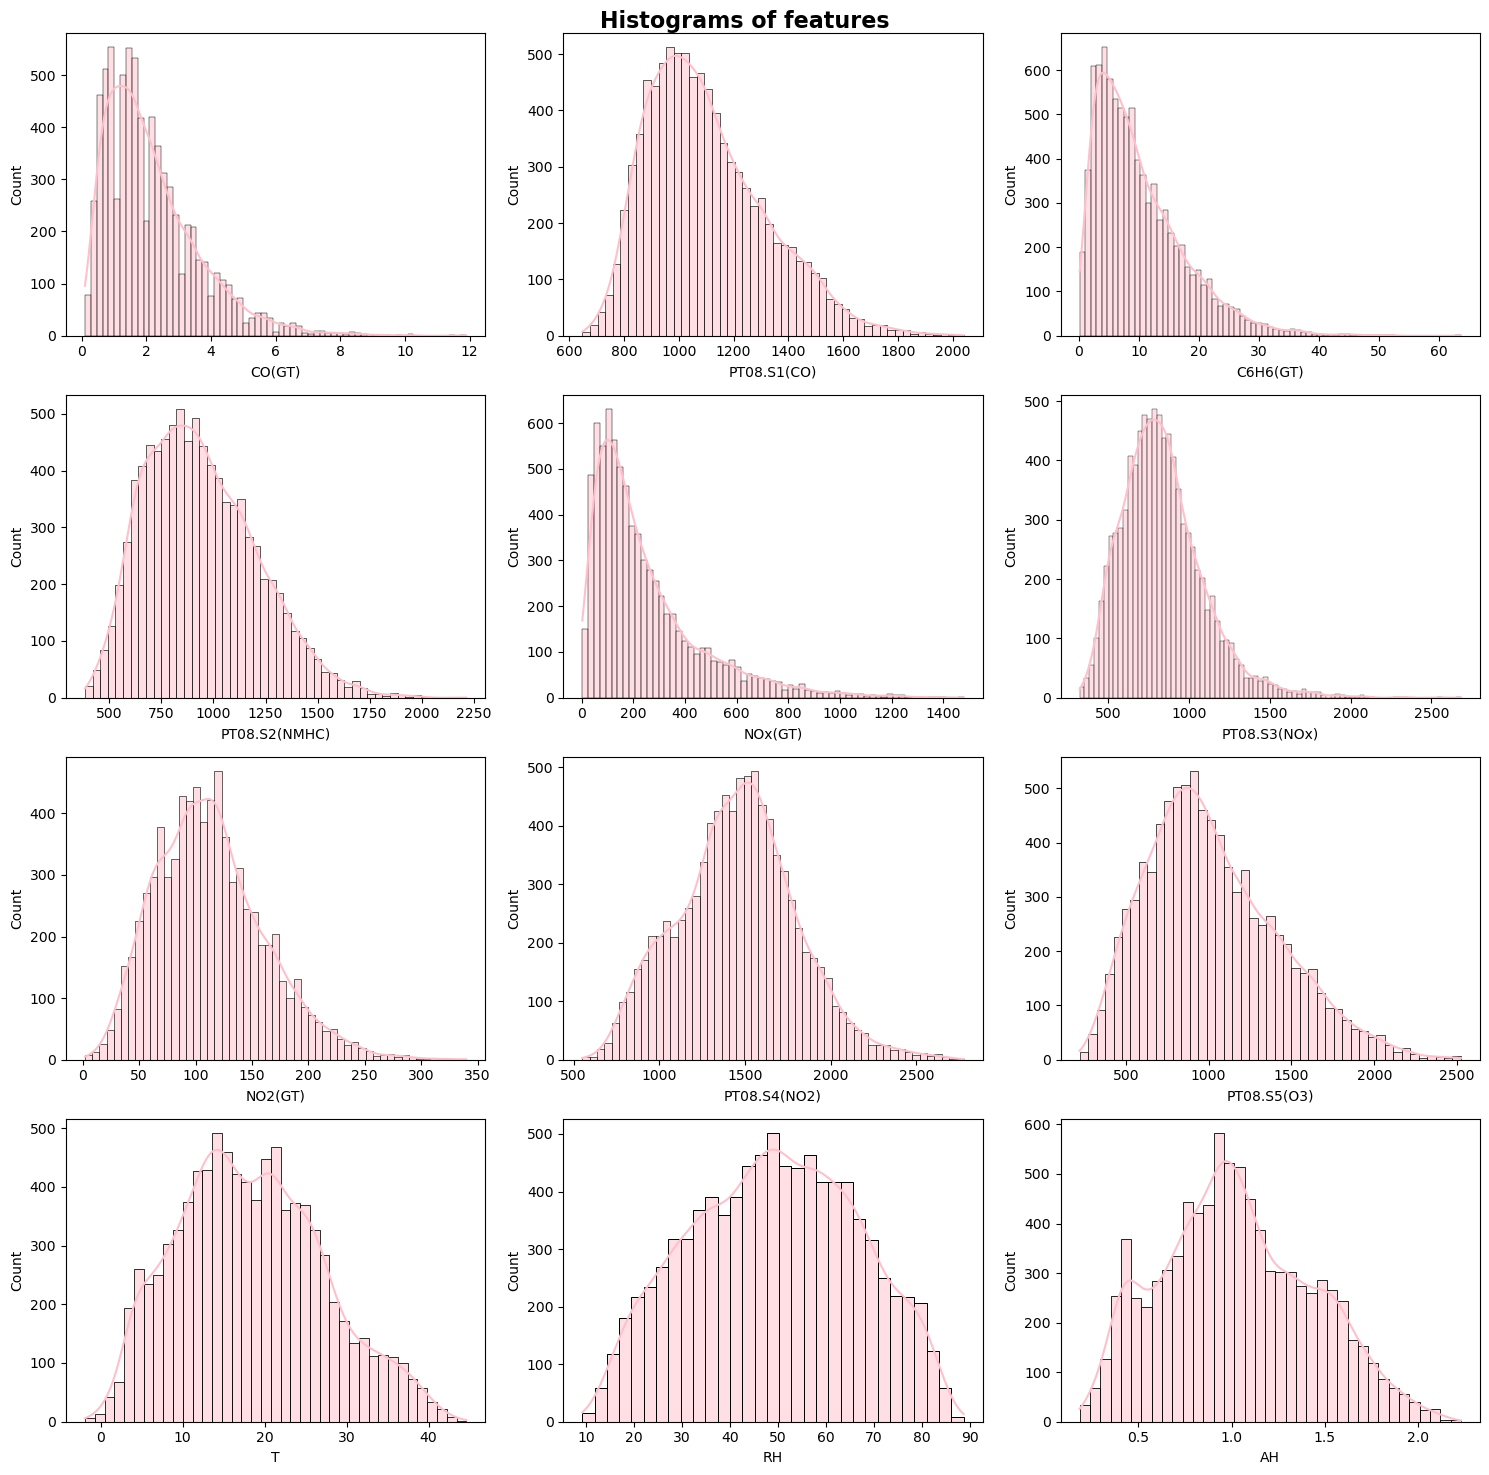

In [35]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=4, ncols=3)
fig.suptitle('Histograms of features', fontsize=16, fontweight='bold')

i = 0
j = 0
cols = df.drop('Time',axis=1).columns.tolist()

for col in cols:
    sns.histplot(ax=axes[i, j], data=df.reset_index(), kde=True, x=col, color='pink')
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout();

In [36]:
df.fillna(df.median(), inplace=True)

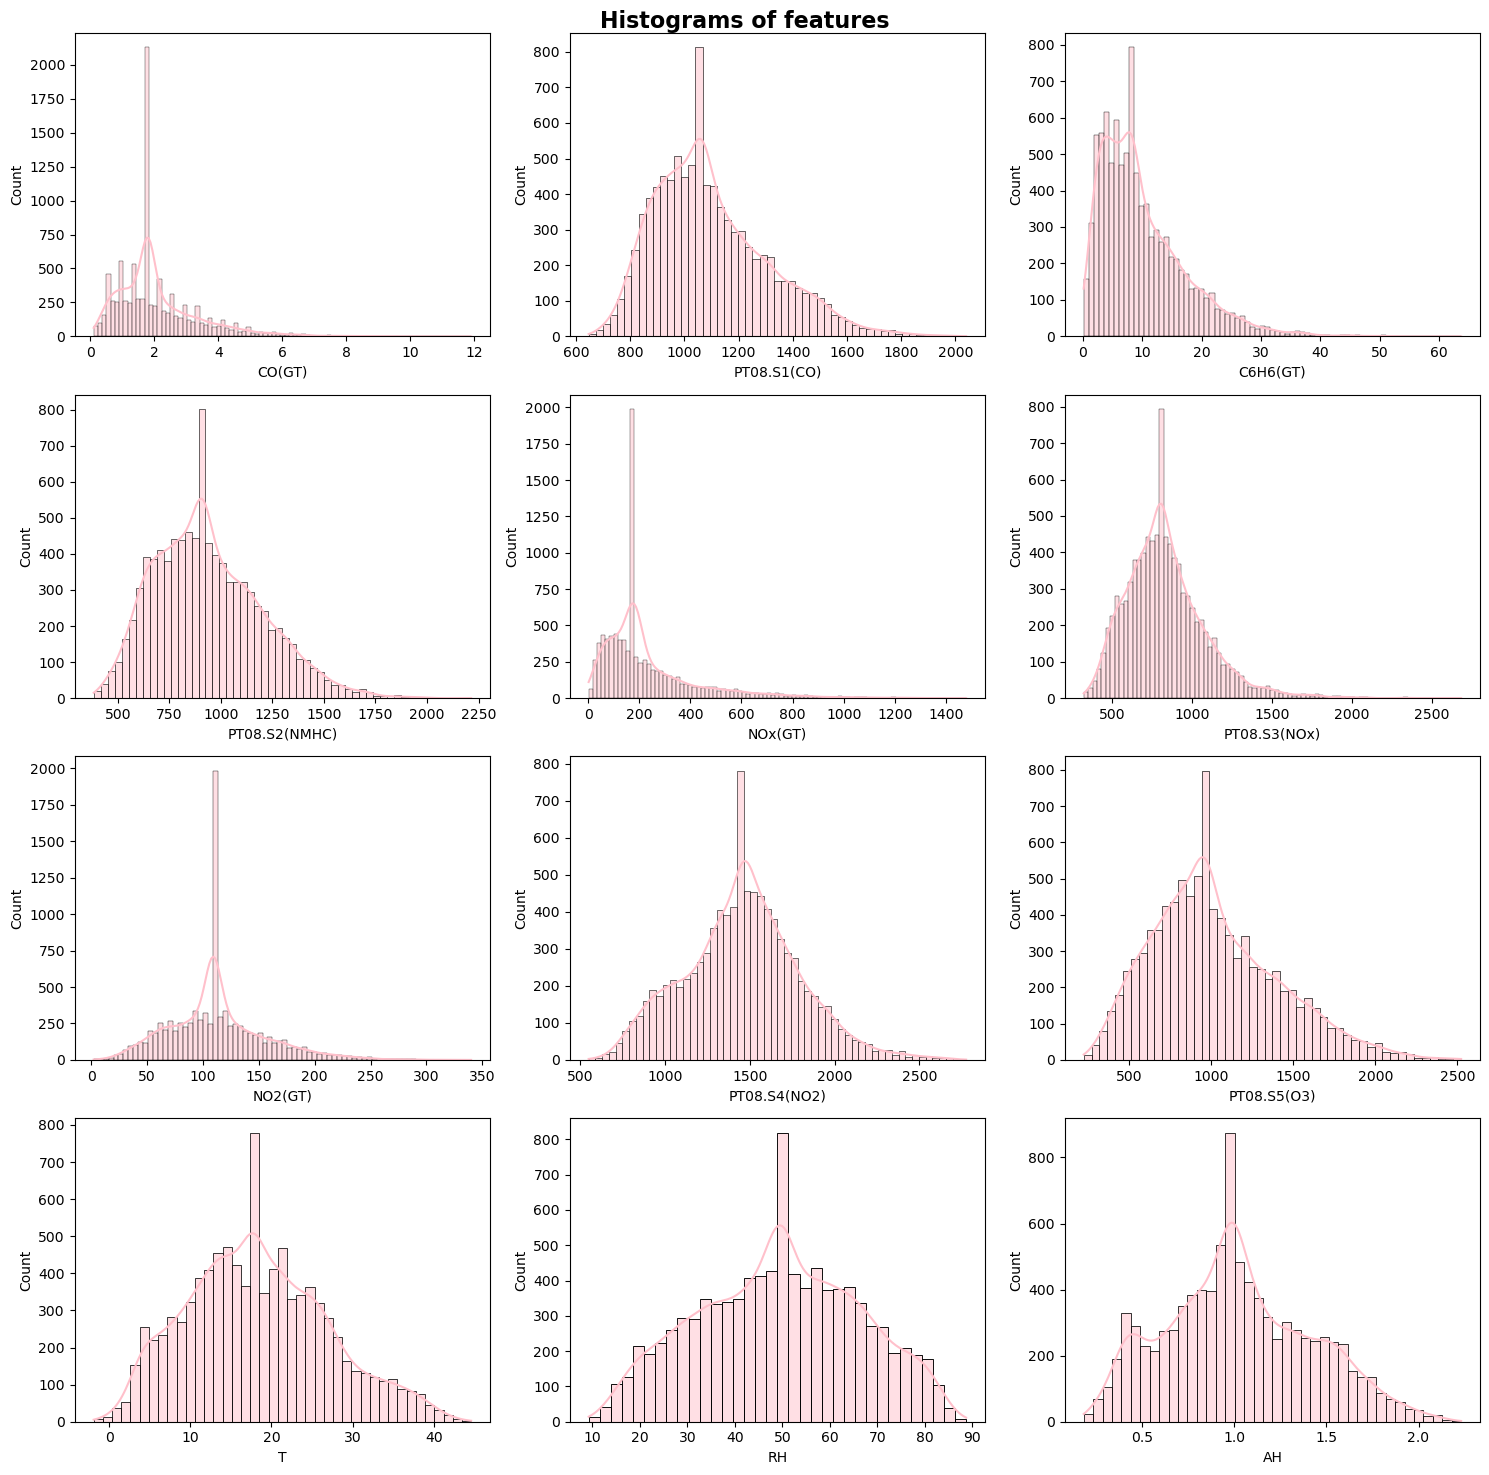

In [37]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=4, ncols=3)
fig.suptitle('Histograms of features', fontsize=16, fontweight='bold')

i = 0
j = 0
cols = df.drop('Time',axis=1).columns.tolist()

for col in cols:
    sns.histplot(ax=axes[i, j], data=df.reset_index(), kde=True, x=col, color='pink')
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout();

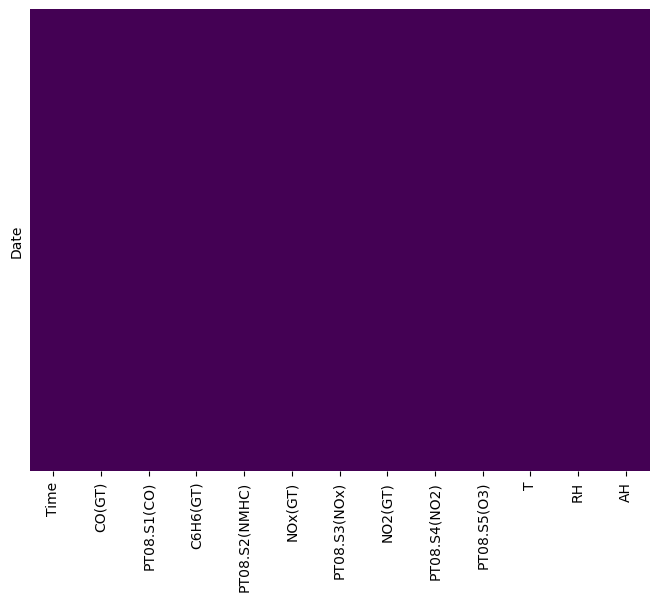

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna(), yticklabels=False, cmap='viridis', cbar=False);

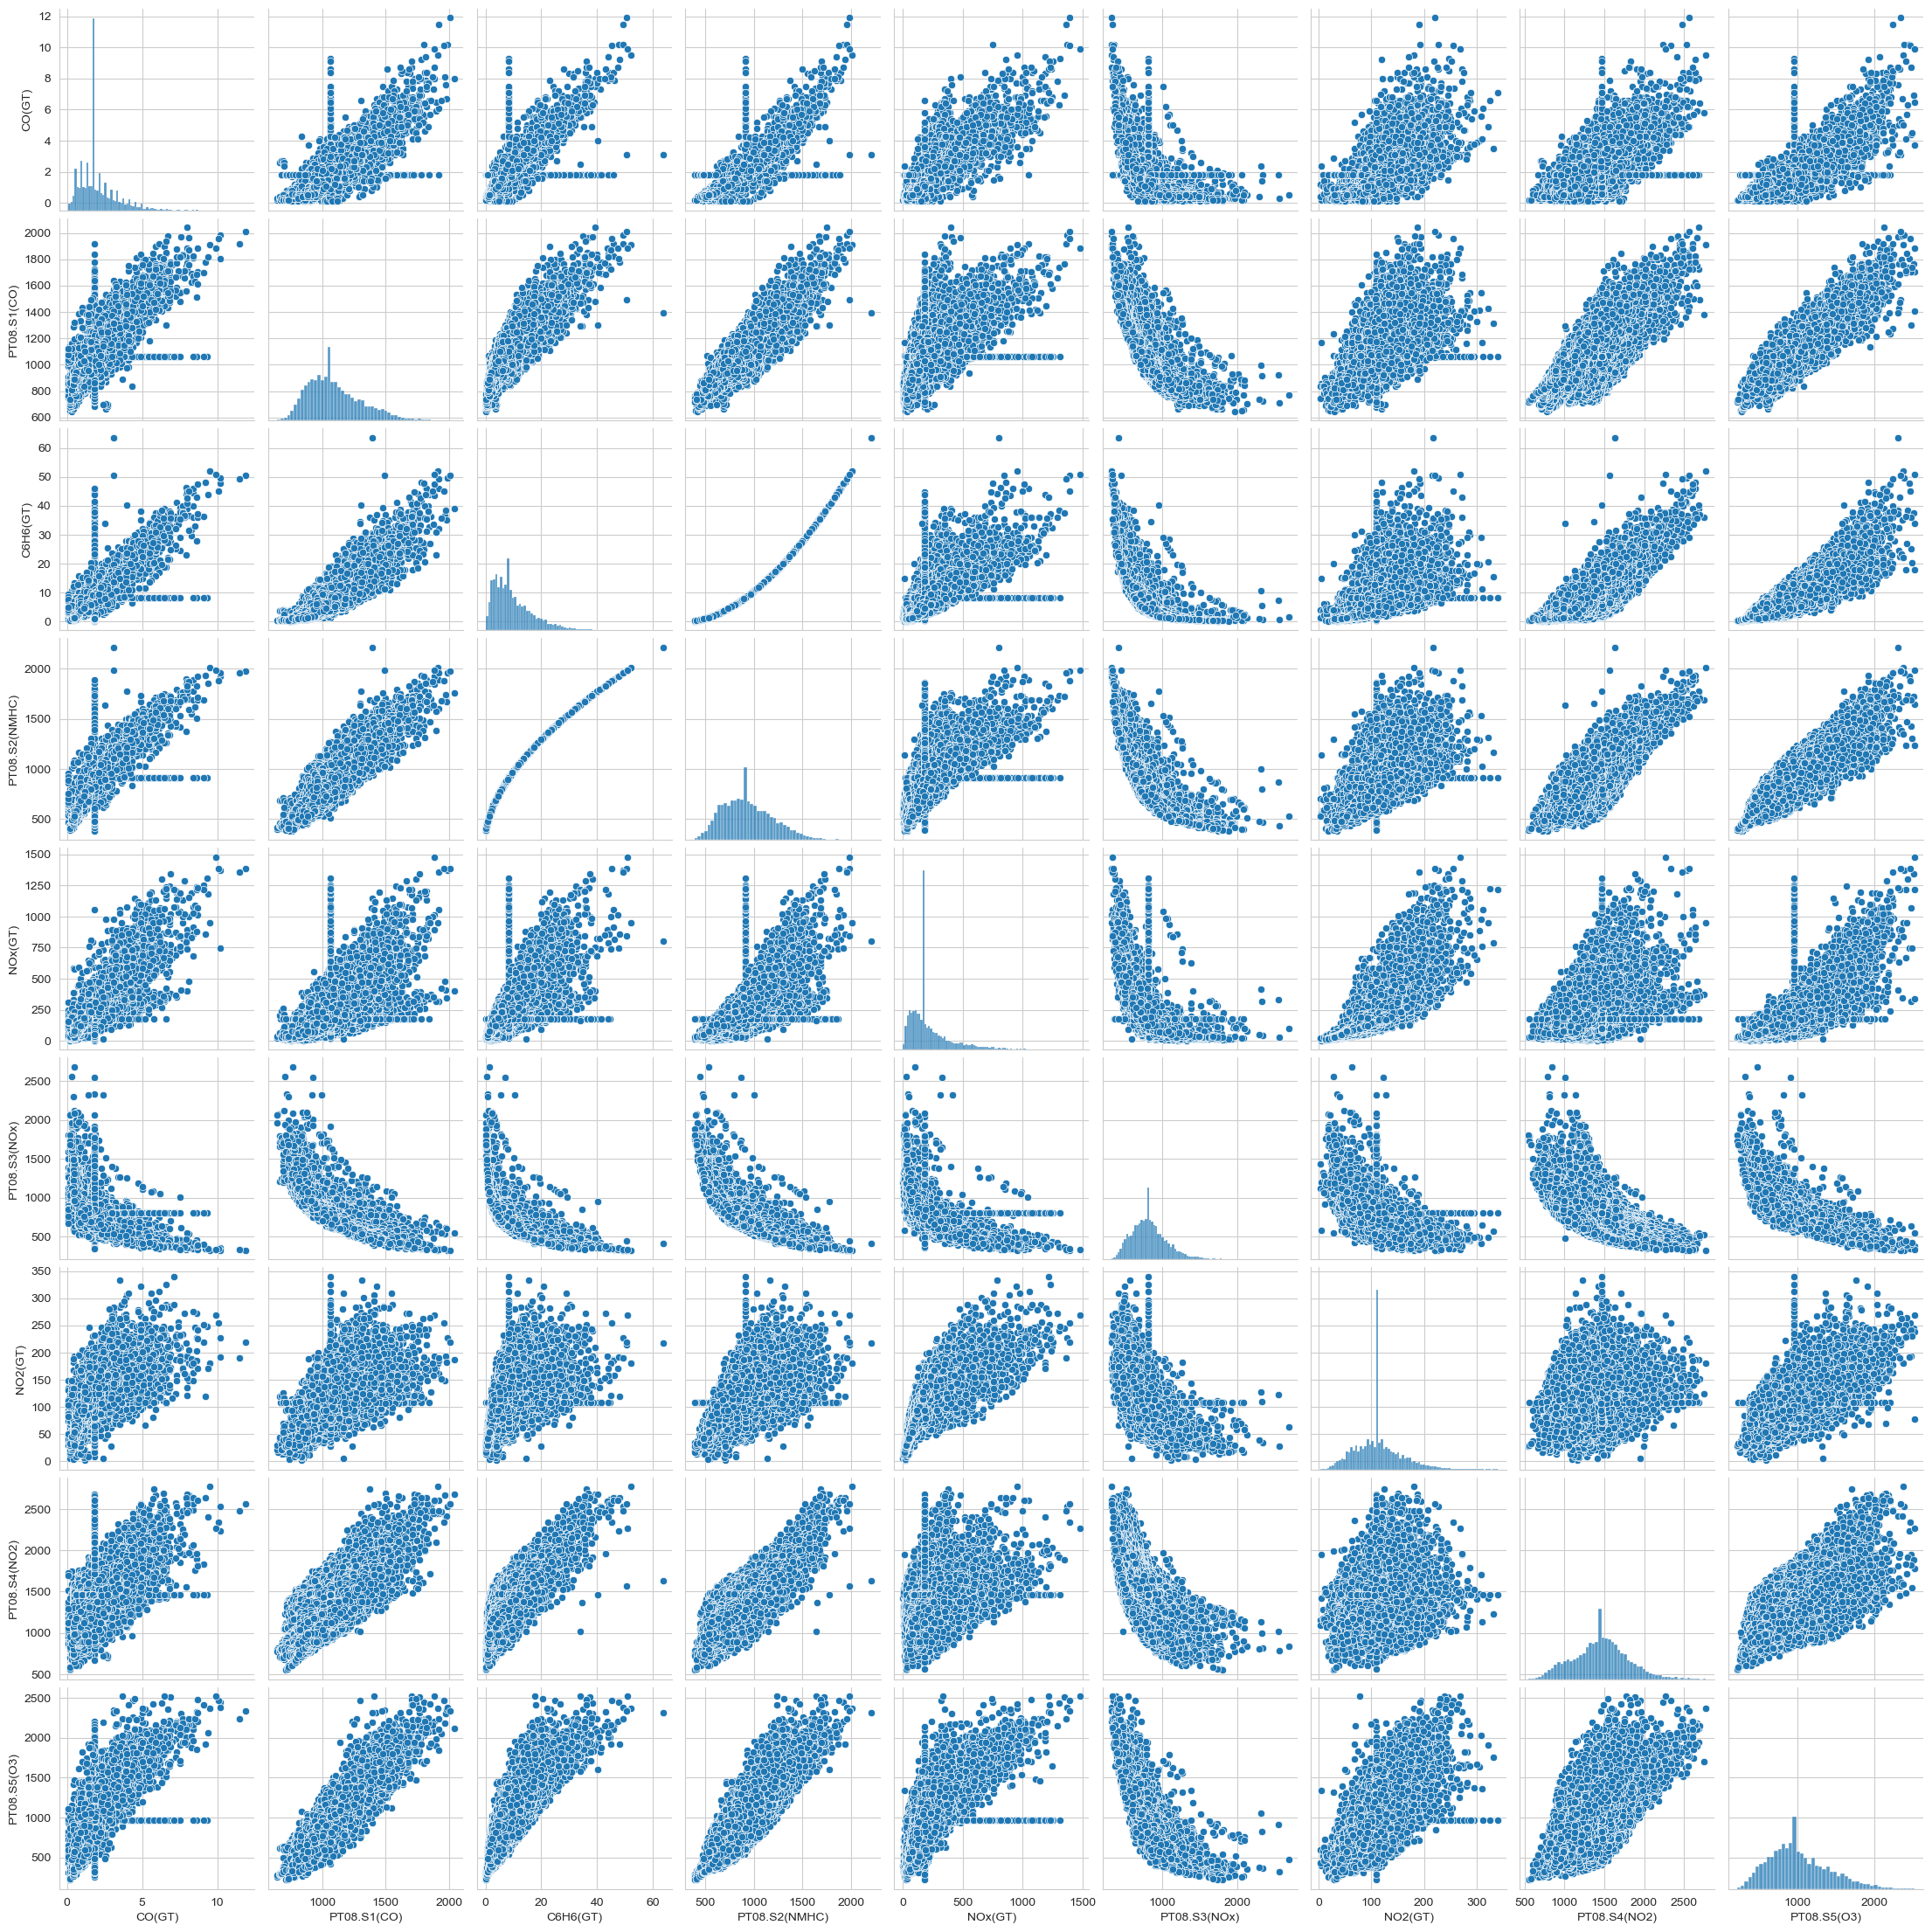

In [39]:
sns.set_style('whitegrid')
sns.pairplot(df.drop(['Time','RH','AH','T'], axis=1));

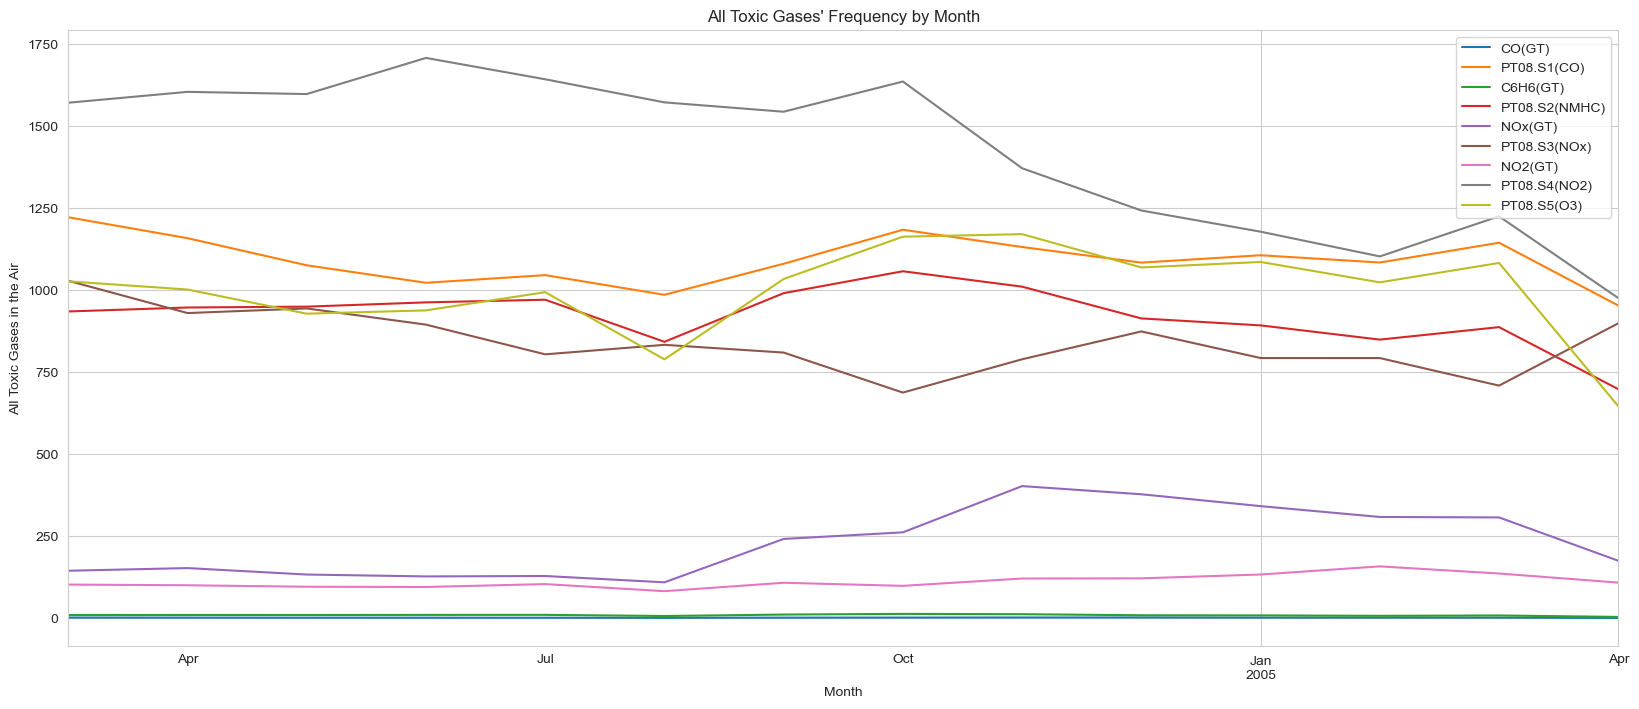

In [40]:
df.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title('All Toxic Gases\' Frequency by Month');

<strong>The graph shows a trend of different toxic gases over time, from April to the following January.</strong>

The Brown line shows the sensor's response that detects Nitrogen Oxides (NOx) and Yellow line shows the sensor's response that detects Ozone (O3). Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2).

Among these gases, the blue line represents - Carbon Monoxide (CO) and the green line represents - Benzene (C6H6) are particularly noteworthy for their ability to cause both immediate health issues and long-term harm even at relatively low concentrations. However the most immediate danger comes from Carbon Monoxide (CO) as it got neither nor smell nor color. 

Both of the gases Carbon Monoxide (CO) and Benzene (C6H6) usually enter the air through different sources: Motor Vehicles, Residential Heating, Industrial Processes, Tobacco Smoke, Wildfires and Burning, and others, among which the motor vehicles are one of the largest sources of both CO and C6H6, particularly in urban areas.

Luckily, they're the the lowest among other gases as it is depicted on the graph.

<strong>CO(GT) - Carbon Monoxide</strong>

- Acute Exposure: Can lead to carbon monoxide poisoning, with symptoms such as headaches, dizziness, weakness, upset stomach, vomiting, chest pain, and confusion. High levels can cause loss of consciousness and death.
- Chronic Exposure: Long-term exposure to lower levels can result in cardiovascular disease and neurological damage.

<strong>C6H6(GT) - Benzene</strong>

- Acute Exposure: Inhalation of benzene can cause drowsiness, dizziness, headaches, tremors, confusion, and unconsciousness. Ingesting high levels can harm the stomach, causing vomiting, irritation, and convulsions.
- Chronic Exposure: Long-term exposure can lead to harmful effects on the bone marrow and can cause blood disorders like anemia. It is also linked to leukemia and other cancers.

<strong>NOx(GT) - Nitrogen Oxides</strong>

- Acute Exposure: Can irritate the lungs, lead to inflammation of the airways, and exacerbate conditions like asthma and bronchitis.
- Chronic Exposure: Prolonged exposure can lead to chronic respiratory diseases, decreased lung function, and increased risk of respiratory infections.

<strong>NO2(GT) - Nitrogen Dioxide</strong>

- Acute Exposure: Short-term exposure can aggravate respiratory diseases, particularly asthma, leading to respiratory symptoms such as coughing, wheezing, and difficulty breathing.
- Chronic Exposure: Long-term exposure can lead to the development of asthma and can increase susceptibility to respiratory infections.

<strong>O3 - Ozone</strong>

- Acute Exposure: Breathing ozone can trigger a variety of health problems including chest pain, coughing, throat irritation, and airway inflammation. It can worsen bronchitis, emphysema, and asthma, leading to increased medical care.
- Chronic Exposure: Long-term exposure to ozone is linked to the development of asthma in children and can affect lung development in children. It can also contribute to chronic obstructive pulmonary disease (COPD).

References: 
- https://www.gdscorp.com/blog/gas-emission/5-types-of-toxic-gas-their-health-effects/;
- https://www.aqi.in/blog/toxic-gases-sources-symptoms-after-effects/

In [41]:
def feature_distplot_month(col):
    df[col].resample('M').mean().plot(kind='bar', figsize=(18,6))
    plt.xlabel('Month')
    plt.ylabel(f'Total {col} in ppb (parts per billion)')
    plt.title(f'Mean Total {col} Level by Month');

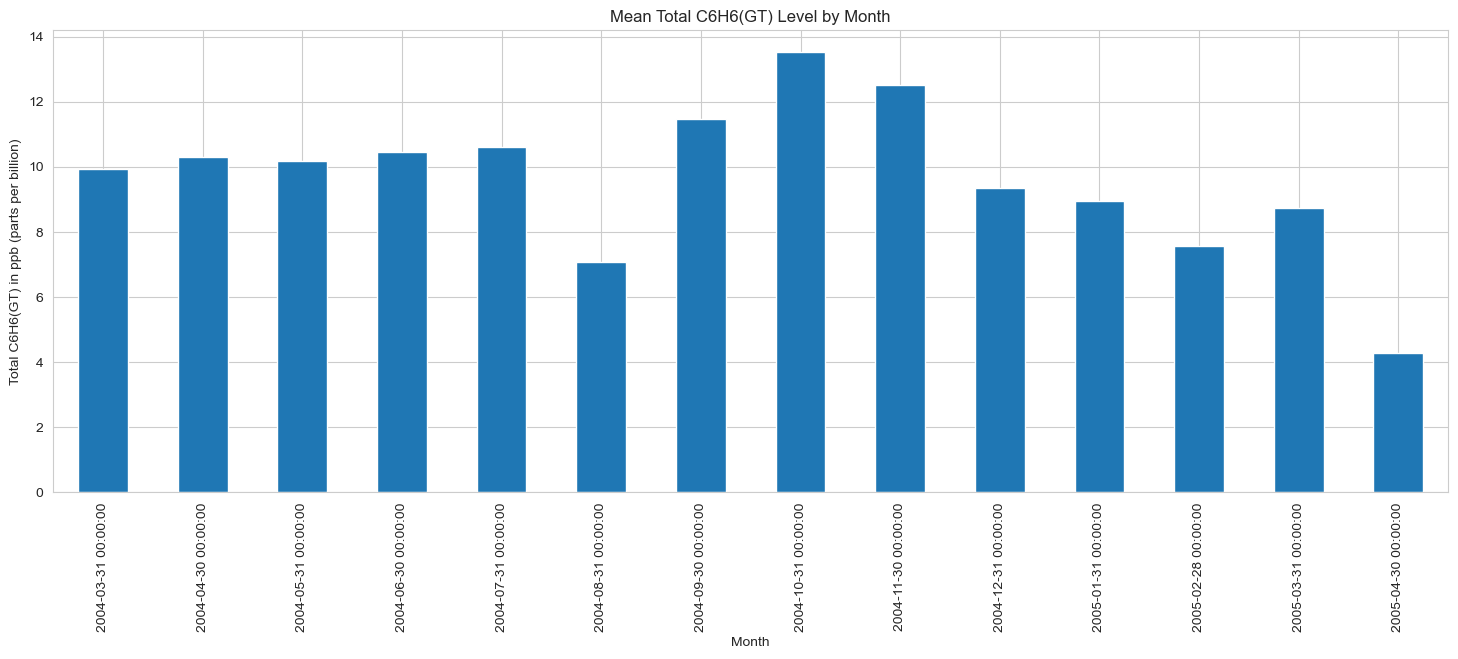

In [42]:
feature_distplot_month('C6H6(GT)')

As we can see on the graph, it's almost neither rising nor decreasing

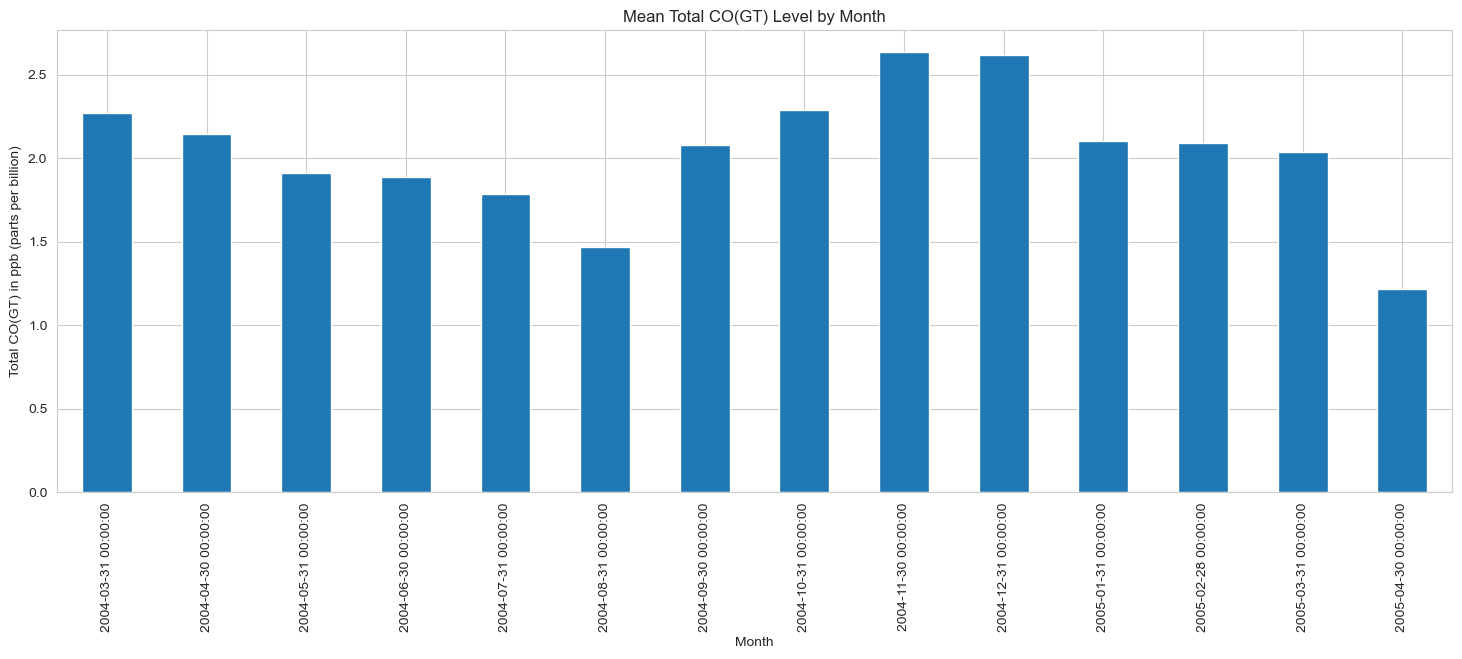

In [43]:
feature_distplot_month('CO(GT)')

Same here, sometime it rises sometime it decreases

In [44]:
def feature_distplot_hour(col):
    plt.figure(figsize=(20,6))
    sns.barplot(x='Time',y=col ,data=df, ci=False)
    plt.xlabel('Hours')
    plt.ylabel(f'Total {col} in ppb (parts per billion)')
    plt.title(f'Mean Total {col} Frequency During a Day');

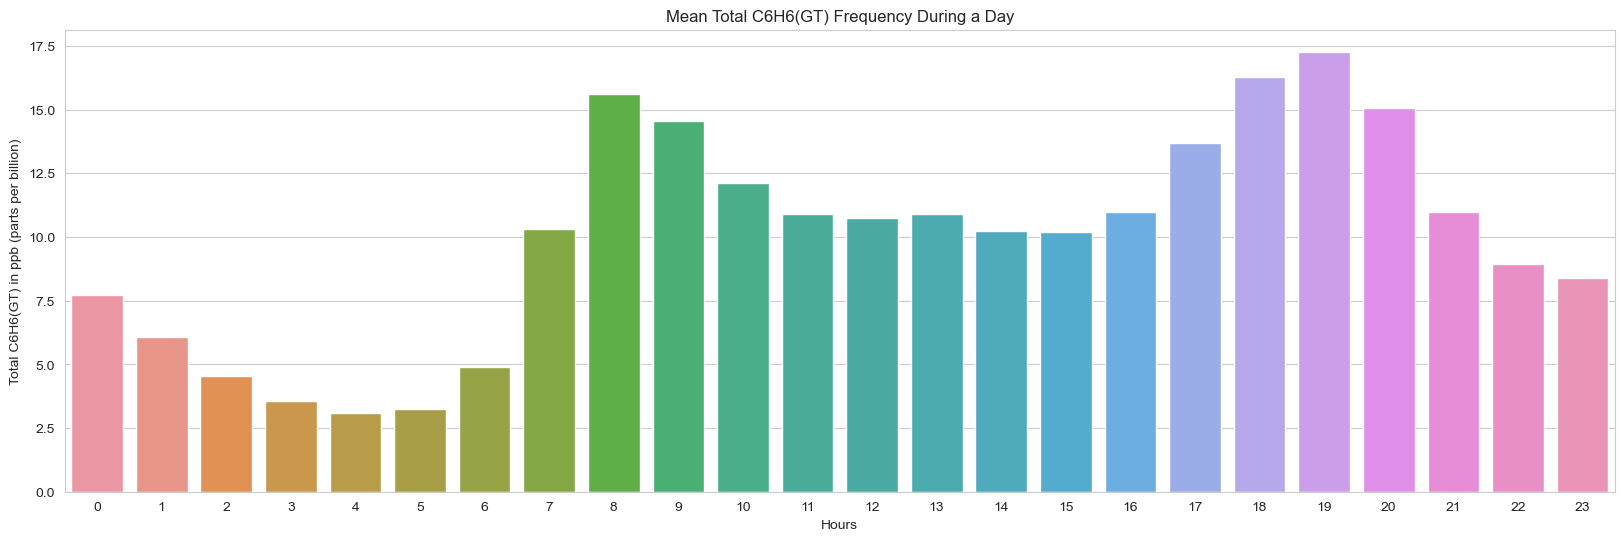

In [45]:
feature_distplot_hour('C6H6(GT)')

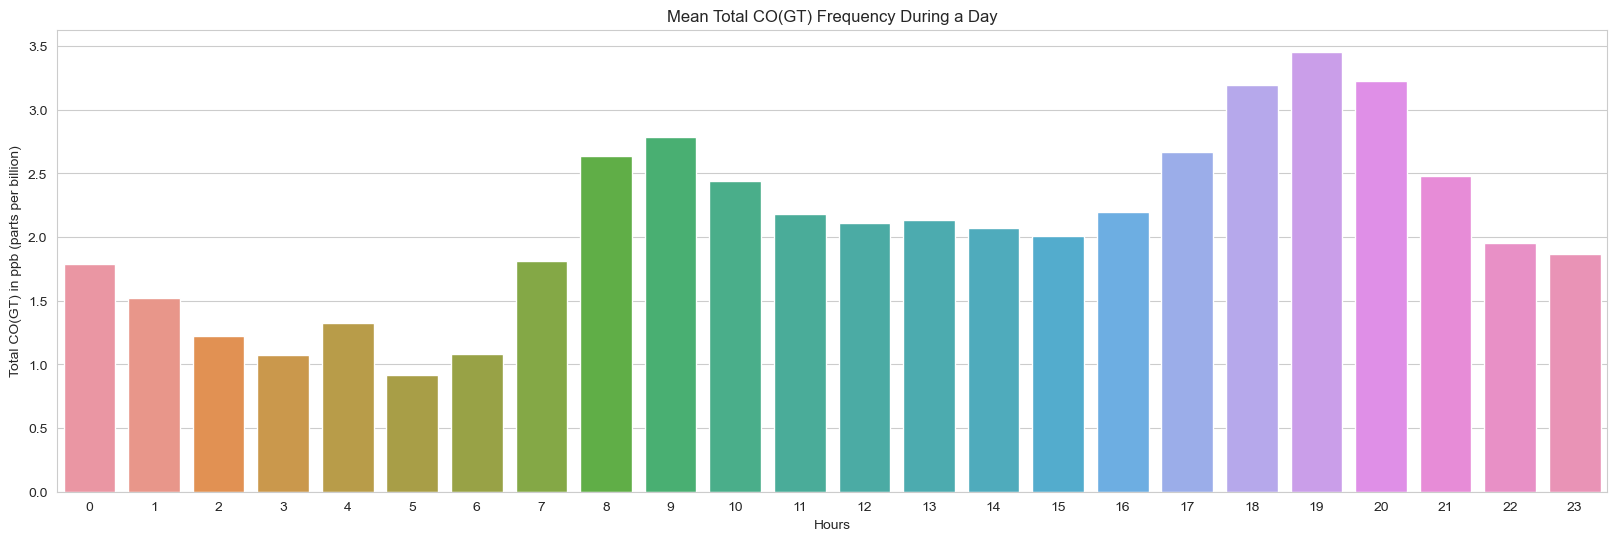

In [46]:
feature_distplot_hour('CO(GT)')

The graphes show Carbon Monoxide and Benzene gas levels during a day. It is seen that, its level is high during evening-night hours because of high use of motor vehicles, phones etc.

The Environmental Protection Agency (EPA) set a 1-hour CO standard at the level of <strong>35,000 ppb</strong> (ppb). (Ref: https://19january2021snapshot.epa.gov/criteria-air-pollutants/naaqs-table_.html)

Here, the graph shows, air has very little amount of CO compared to its standard measurement which is very good.

The World Health Organization (WHO) recommends minimizing benzene exposure as much as possible, aiming for an annual average concentration below 1.7 µg/m³ (which is roughly equivalent to <strong>0.5 ppb</strong>), to reduce the risk of cancer. (Ref: https://www.who.int/teams/environment-climate-change-and-health/chemical-safety-and-health/health-impacts/chemicals/benzene)

Here, the graph shows, air has huge amount of C6H6 compared to its desired measurement which is awful.

# Data scaling

In [48]:
X = df.drop('C6H6(GT)', axis=1)
y = df['C6H6(GT)']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
r_scaler = RobustScaler()
X_train = r_scaler.fit_transform(X_train)
X_test = r_scaler.transform(X_test)

# Models

## Decision Tree Regressor

In [52]:
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train,y_train)

DecisionTreeRegressor()

In [54]:
pred = dtreg.predict(X_test)

In [100]:
def real_vs_pred(x,y):
    sns.scatterplot(x=x, y=y, color='pink')
    plt.title('Actual VS Predicted vals')
    plt.xlabel('Predicted')
    plt.ylabel('Actual');

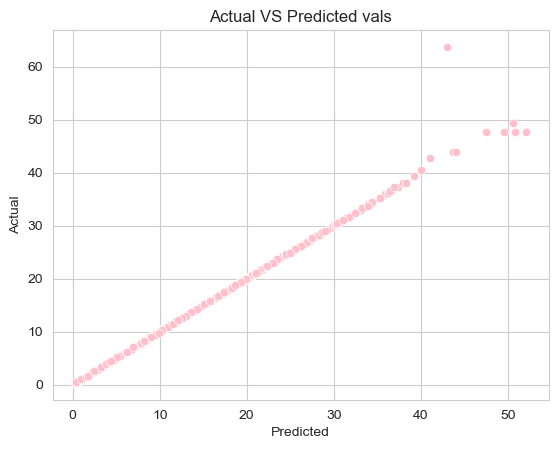

In [101]:
real_vs_pred(y_test,pred)

In [63]:
dtreg.score(X_train, y_train)

1.0

In [64]:
dtreg.score(X_test, y_test)

0.9969372865776143

### Hyperparameter tuning

In [91]:
param_grid = {'splitter': ['best','random'],
              'max_depth': [2,3,4,5,None],
              'min_samples_leaf': np.arange(1,9),
              'criterion': ['mae', 'mse', 'friedman_mse'],
              'max_features': ['auto', 'log2','sqrt',None]}

In [93]:
dtreg_grid = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=5)
dtreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae', 'mse', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'splitter': ['best', 'random']})

In [94]:
dtreg_grid.best_score_

0.9992153206610727

In [95]:
dtreg_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [102]:
pred = dtreg_grid.predict(X_test)

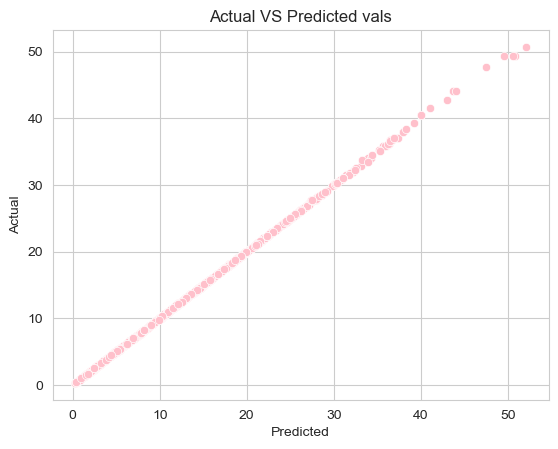

In [104]:
real_vs_pred(y_test,pred)

In [144]:
dtreg_grid_train = dtreg_grid.score(X_train,y_train)
dtreg_grid_train

1.0

In [146]:
dtreg_grid_test = dtreg_grid.score(X_test,y_test)
dtreg_grid_test

0.9999308089588255

## Random Forest Regressor

In [110]:
rfreg = RandomForestRegressor(n_estimators=11, random_state=101)
rfreg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=11, random_state=101)

In [111]:
pred = rfreg.predict(X_test)

In [113]:
rfreg.score(X_train,y_train)

0.9998450798083492

In [114]:
rfreg.score(X_test,y_test)

0.999761195549639

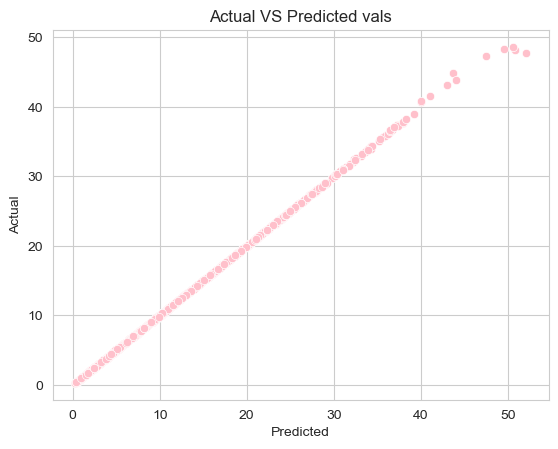

In [112]:
real_vs_pred(y_test,pred)

### Hyperparameter tuning

In [123]:
param_grid = {'n_estimators': np.arange(10,110,10),
              'criterion': ['friedman_mse','absolute_error'],
              'max_depth': [2,3,4,5,None],
              'min_samples_leaf': np.arange(1,9),
              'max_features': ['auto','log2','sqrt',None]}

In [125]:
rfreg_grid = RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5,random_state=101)
rfreg_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, None],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=101)

In [158]:
rfreg_grid_train = rfreg_grid.score(X_train, y_train)
rfreg_grid_train

0.999544433969561

In [159]:
rfreg_grid_test = rfreg_grid.score(X_test, y_test)
rfreg_grid_test

0.9998737721896864

In [128]:
rfreg_grid.best_score_

0.9989034681559662

In [129]:
rfreg_grid.best_params_

{'n_estimators': 80,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': None,
 'criterion': 'friedman_mse'}

In [133]:
pred = rfreg_grid.predict(X_test)

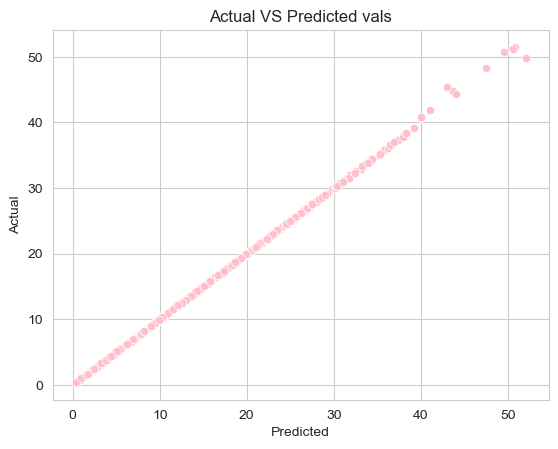

In [135]:
real_vs_pred(y_test, pred)

## XGBoost

In [137]:
xgbreg = XGBRegressor()
xgbreg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [138]:
pred = xgbreg.predict(X_test)

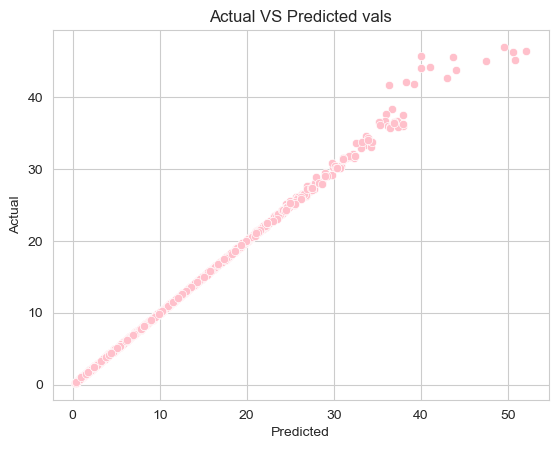

In [139]:
real_vs_pred(y_test,pred)

In [140]:
xgbreg.score(X_train,y_train)

0.9999798084466984

In [142]:
xgbreg.score(X_test,y_test)

0.9983342111956973

### Hyperparameter tuning

In [147]:
param_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05,0.1,0.15,0.20],
    'min_child_weight': [1,2,3,4],
    'booster': ['gbtree','gblinear'],
    'base_score': [0.25,0.5,0.75,1]
}

In [150]:
xgbreg_grid = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=param_grid,
            cv=5,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=101)

In [151]:
xgbreg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=101, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [152]:
xgbreg_grid.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
xgbreg_grid_train = xgbreg_grid.best_estimator_.score(X_train, y_train)
xgbreg_grid_train

0.9999999088495322

In [157]:
xgbreg_grid_test = xgbreg_grid.best_estimator_.score(X_test, y_test)
xgbreg_grid_test

0.9982604315262293

# Conclusion

In [160]:
results = pd.DataFrame({'Models': ['Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost'],
                        'Train score': [dtreg_grid_train, rfreg_grid_train, xgbreg_grid_train],
                        'Test score': [dtreg_grid_test, rfreg_grid_test, xgbreg_grid_test]})

results.sort_values('Test score',ascending=False)

Models  Train score  Test score
0  Decision Tree Regressor     1.000000    0.999931
1  Random Forest Regressor     0.999544    0.999874
2                  XGBoost     1.000000    0.998260

- Most gases (like CO, NOx) are increased in the air over time.
- The frequency of Oxides in Nitrogen is increasing.
- During the day most gases's level is high at evening-night.
- <strong>The Decision Tree Regressor is the best model out of all. It shows not only perfect training performance but also the highest test score, indicating excellent generalization with minimal overfitting compared to the other models.</strong>